In [87]:
import tensorflow as tf
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
      assert tensor.shape[0]==1
      tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [88]:
def image_to_tensor(path_to_img):
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3, dtype=tf.float32)

  #Resize the image to specific dimensions
  img = tf.image.resize(img, [512,512])
  img = img[tf.newaxis, :]
  return img


In [89]:
gambar1 = '/content/kambing.jpeg'
gambar2 = '/content/lukisan.jpg'

In [90]:
bintang = image_to_tensor(gambar1)
lukisan = image_to_tensor(gambar2)
#test aryawa bintang

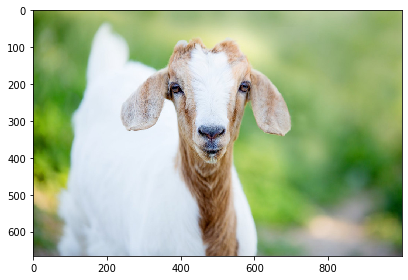

In [91]:
from skimage import io
img = io.imread(gambar1)
io.imshow(img)

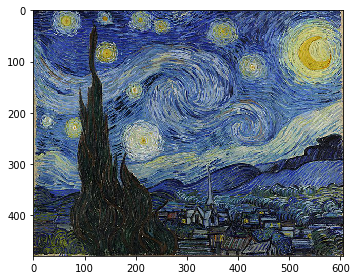

In [92]:
img2 = io.imread(gambar2)
io.imshow(img2)

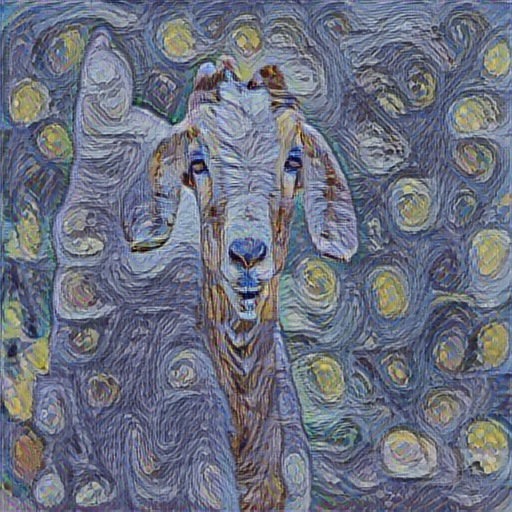

In [93]:
import tensorflow_hub as hub
import numpy as np
from PIL import Image
import time
import functools
import matplotlib.pyplot as plt
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_module(tf.constant(bintang), tf.constant(lukisan))[0]
tensor_to_image(stylized_image)